### Homework 1

이번 과제에서는 python을 활용하여 금융시장에서 사용되는 여러 문제들을 풀어보도록 한다.

#### 1. Capital Asset Pricing Model
**Gordon의 기업 성장 모형**과 **자본자산가치결정모형(CAPM)** 에 따르면 투자자가 기업에 요구하는 요구 수익률은 다음과 같이 정의된다

$$k = r_f + \beta(E(r_m) - r_f)$$

여기서 $k$는 요구수익률, $r_f$는 무위험이자율, $r_m$는 기업 주식의 수익률, $\beta$는 기업의 시장 프리미엄을 의미한다

**1.1** 위 산식을 함수로 작성하라

In [1]:
def GordonRequiredModel(risk_free : float, return_market : float, beta : float) -> float :
    required_return = risk_free + beta * (return_market - risk_free)
    return required_return

**1.2** 2023년 2월 14일 한국의 30일 평균 무위험이자율은 3.4129%이다. 어느 기업 A의 30일 평균 주식 수익률이 7.4%였다고 할 때, 투자자가 이 기업 A에 기대하는 요구수익률은 얼마인가?(베타는 1.2로 가정한다) 작성한 함수를 이용해 계산하라.

In [2]:
risk_free = 0.034129
beta = 1.2
return_market = 0.074

required_rate = GordonRequiredModel(risk_free, return_market, beta)
print("The expected required return rate is ", required_rate)

The expected required return rate is  0.0819742


**1.3** 위 기업의 경우에서 무위험이자율을 2.5%라고 가정할 때의 요구수익률을 계산하라

In [3]:
risk_free = 0.025
beta = 1.2
return_market = 0.074

required_rate = GordonRequiredModel(risk_free, return_market, beta)
print("The expected required return rate is ", required_rate)

The expected required return rate is  0.08379999999999999


#### 2. 주식가치 결정모형

Gordon의 주식 가치 결정 모델에서 적정 주가는 다음과 같이 정의된다

$$P = \frac{D(1+g)}{k-g}$$

여기서 $k$는 요구수익률, $D$는 배당금, $g$는 배당 증가율, $P$는 기업의 적정 주가를 의미한다

**2.1** 위 산식을 함수로 작성하라

In [4]:
def StockValuation(required_rate : float, dividend : int, growth_rate : float) -> float :
    stock_value = dividend * (1 + growth_rate) / (required_rate - growth_rate)
    return stock_value

**2.2** 1번의 요구수익률을 가정하고, 기존의 기업 배당금은 1주당 1천원, 배당 증가율이 3%라면 이 기업의 적정 주가는 얼마인가?

In [5]:
risk_free = 0.034129
beta = 1.2
return_market = 0.074
dividend = 1000
growth_rate = 0.03
required_rate = GordonRequiredModel(risk_free, return_market, beta)

stock_value = StockValuation(required_rate, dividend, growth_rate)
print("The intrinsic Stock Valuation is ", stock_value)

The intrinsic Stock Valuation is  19817.524848867324


#### 3. 위험조정 성과지표
포트폴리오의 성과평가에 사용되는 위험조정성과지표는 다음과 같은 것들이 존재한다

**Sharpe Ratio (RVAR)**

$$\mathbf{SR_P} = \frac{r_P-r_f}{\sigma_P}$$

**Treynor Ratio**

$$\mathbf{TR_P} = \frac{r_P-r_F}{\beta_P}$$

**Jensen Ratio**

$$\alpha_P = (r_P - r_f) - \beta_P (r_m - r_f)$$

**Information Ratio**

$$\mathbf{IR_P} = \frac{\alpha_P}{\sigma^2(\epsilon_P)}$$

- 여기서 $r_P$는 포트폴리오 수익률, $r_f$는 무위험이자율, $r_m$는 시장수익률, $\beta_P$는 포트폴리오의 베타, $\sigma_P$는 리스크를 나타낸다

위 변수들을 입력하고 각자의 성과지표를 method를 통해 계산하는 Class를 작성하라

In [6]:
class PerformanceMetrics(object):
    def __init__(self, risk_portfolio : float, risk_free : float, risk_market : float, beta : float, sigma : float):
        self.risk_portfolio = risk_portfolio
        self.risk_free = risk_free
        self.risk_market = risk_market
        self.beta = beta
        self.sigma = sigma
        self.epsilon = self.risk_portfolio - self.risk_market

    def sharpe_ratio(self) -> float:
        return (self.risk_portfolio - self.risk_free) / self.sigma

    def treynor_ratio(self) -> float:
        return (self.risk_portfolio - self.risk_free) / self.beta

    def jensen_ratio(self) -> float:
        return (self.risk_portfolio - self.risk_free) - self.beta * (self.risk_market - self.risk_free)

    def information_ratio(self) -> float:
        return self.jensen_ratio() / (self.epsilon ** 2)

#### 4. 파생상품 차익거래

파생상품의 차익거래 이론에서 다음과 같은 개념들이 있다

**Basis**

$$\mathbf{Basis} = F_t - S_t = S_t[1 + (r-d)\frac{\tau}{365}]-S_t = S_t[(r-d)\frac{\tau}{365}]$$

- 여기서 $F_t$는 선물가격, $S_t$는 기초자산의 가격, $r_f$는 수익률, $d$는 배당수익률, $\tau$는 잔존기간을 뜻한다
- Basis가 0보다 크면 **Contango** 시장이라 하며, 0보다 작으면 **Backwardation** 시장이라고 한다

**단순헤지비율**

$$h = \frac{S_t}{F_t}$$

- 여기서 $S_t$는 기초자산의 가격, $F_t$는 선물의 가격을 말하며, $h$는 기초자산을 선물로 헤지할 때 매도해야 할 선물의 계약 수를 나타낸다

**4.1** Basis를 계산하는 method와 Contango, Backwardation을 구분하는 method, 단순 헤지비율을 계산하는 method를 포함한 class를 작성하라

In [7]:
class Derivatives(object):
    def __init__(self, future_price : float,
                 spot_price : float,
                 interest_rate : float,
                 dividend_rate : float,
                 time_to_maturity : int) :
        self.future_price = future_price
        self.spot_price = spot_price
        self.interest_rate = interest_rate
        self.dividend_rate = dividend_rate
        self.time_to_maturity = time_to_maturity

    def calculate_basis(self) -> float:
        basis = self.spot_price * (self.interest_rate - self.dividend_rate) * (self.time_to_maturity / 365)
        return basis

    def market_type(self) -> float:
        basis = self.calculate_basis()
        if basis > 0:
            return "Contango"
        elif basis < 0:
            return "Backwardation"
        else:
            return "Neutral"

    def calculate_hedge_ratio(self) -> float:
        hedge_ratio = self.spot_price / self.future_price
        return hedge_ratio

**4.2** 현물이 1000point, 선물이 2000point고 수익률이 8%, 배당수익률이 3%이며 잔존만기가 90일인 파생상품을 모델링하여 Basis와 단순헤지비율, Contango market인지 Backwardation market인지 판단해 보라. 작성한 Class는 문제없이 작동하는가?

In [8]:
future_price = 2000
spot_price = 1000
interest_rate = 0.08
dividend_rate = 0.03
time_to_maturity = 90

derivatives_trading = Derivatives(future_price, spot_price, interest_rate, dividend_rate, time_to_maturity)

basis = derivatives_trading.calculate_basis()
market_type = derivatives_trading.market_type()
hedge_ratio = derivatives_trading.calculate_hedge_ratio()

print("Basis:", basis)
print("Market Type:", market_type)
print("Hedge Ratio:", hedge_ratio)

Basis: 12.32876712328767
Market Type: Contango
Hedge Ratio: 0.5


#### 5. Moving Average

Moving Average는 주식시장에서 많이 쓰이는 개념으로, 시장의 장단기 추세를 확인하는데 유용하다

<center><img src = "https://bpcdn.co/images/2016/05/grade4-moving-average-trend.png" alt="My Image"></center>

기본적인 자료구조 중 Queue를 이용하여 구현이 가능하다

<center><img src = "https://blog.kakaocdn.net/dn/5NOv1/btqSTINnoq8/4f8bjzzf6W4POewlq8At31/img.png" alt="My Image"></center>

Queue는 기본적으로 다음과 같은 특성을 가진다. 아래 간단한 Queue 함수 구현 예제 코드가 작성되어 있다

- 기본적인 자료 구조의 한가지로, 먼저 집어 넣은 데이터가 먼저 나오는 FIFO(First In First Out)구조로 저장하는 형식이다
- 선입선출 (First in First out) 방식을 따른다
- 접근 방법은 목록의 처음에서 나타난다
- 큐 자료구조에 필요한 주된 연산은 다음과 같다
    - enqueue(a) : 큐에 a의 원소 추가
    - dequeue : 가장 오래 전에 추가한 원소를 삭제하여 반환
    - front : 가장 오래 전에 추가한 원소를 삭제하지 않고 반환
    - isempty : 빈 큐인지 조사

In [9]:
def queue(pList : list, numMA : int) -> list :
    MA = []
    Q = []
    mSum = pList[0] * numMA
    for i in range(numMA) :
        Q.append(pList[0])
    for M in pList :
        mSum = mSum - Q.pop(0)
        mSum += M
        MA.append(mSum/numMA)
        Q.append(M)

    return Q

아래는 KOSPI 지수의 2023년 1월 2일부터 1월 20일까지의 주가 지수이다. queue 함수를 적절히 활용하여 3일, 5일 이동평균 값을 구하여라

In [10]:
kospi = {'2023-01-02' : '2225.67', '2023-01-03' : '2218.68', '2023-01-04' : '2255.98', '2023-01-05' : '2264.65',
         '2023-01-06' : '2289.97', '2023-01-09' : '2350.19', '2023-01-10' : '2351.31', '2023-01-11' : '2359.53',
         '2023-01-12' : '2365.10', '2023-01-13' : '2386.09', '2023-01-16' : '2399.86', '2023-01-17' : '2379.39',
         '2023-01-18' : '2368.32', '2023-01-19' : '2380.34', '2023-01-20' : '2395.26'}

In [11]:
def MovingAverage(pList: list, numMA: int) -> list:
    moving_average = []
    queue = []
    for i in range(len(pList)):
        queue.append(pList[i])

        if len(queue) < numMA:
            moving_average.append(None)
        else:
            if i < numMA - 1:
                moving_average.append(None)
            else:
                moving_average.append(sum(queue[-numMA:]) / numMA)
    return moving_average

In [12]:
kospi = [float(val) for val in kospi.values()]

# Calculate 3-day and 5-day moving averages using the improved function
ma3 = MovingAverage(kospi, 3)
ma5 = MovingAverage(kospi, 5)

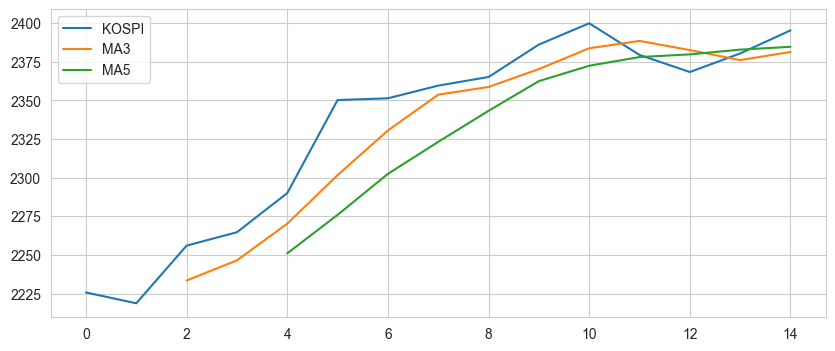

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
plt.plot(kospi, label = 'KOSPI')
plt.plot(ma3, label = 'MA3')
plt.plot(ma5, label = 'MA5')
plt.legend()